In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3LM-0204FreeFallLSQM/'
FileBaseName = '3LM-0204FreeFallLSQM'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
#
############################################
import pandas as pd
print('pandas     Ver.', pd.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
import sklearn.preprocessing as prep
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
pandas     Ver. 2.2.3
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3LM-0204FreeFallLSQM/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3LM-0204FreeFallLSQM/


線形写像の最小二乗法

* 線形写像:
$$
\boldsymbol{y}\approx\mathbf{X}\,\boldsymbol{\omega}
$$

* 最小二乗法型の一般化逆行列:
$$
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
$$

* 最小二乗法の解:
$$
\hat{\boldsymbol{\omega}}
=
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
\boldsymbol{y}
$$

---
自由落下:
$$
    y(t)
    =
    v_{0}t
    -
    \frac{1}{2}
    g
    t^{2}
$$

自由落下計測データ

In [4]:
############################################
DataFile = '3LM-0204FreeFallLSQM.xlsx'
#
DataPath = IpynbDir + DataFile
df_FreeFall = pd.read_excel( DataPath )
print( df_FreeFall )
#
data_t = np.array( df_FreeFall['sec'] )
print( data_t )
#
data_y = np.array( df_FreeFall['y_m'] )
print( data_y )

   sec   y_m
0    0   0.0
1    1  34.0
2    2  59.3
3    3  75.9
4    4  81.7
5    5  77.5
6    6  62.2
7    7  38.7
8    8   8.0
[0 1 2 3 4 5 6 7 8]
[ 0.  34.  59.3 75.9 81.7 77.5 62.2 38.7  8. ]


自由落下:
$$
    y(t)
    =
    v_{0}t
    -
    \frac{1}{2}
    g
    t^{2}
$$

$$
    \left(
      \begin{array}{c}
        y_{1}  \\
        \vdots \\
        y_{n}  \\
        \vdots \\
        y_{N}
      \end{array}
    \right)
    =
    \left(
      \begin{array}{cc}
        t_{1}  & -\frac{1}{2}t_{1}^{2} \\
        \vdots & \vdots                \\
        t_{m}  & -\frac{1}{2}t_{m}^{2} \\
        \vdots & \vdots                \\
        t_{M} & -\frac{1}{2}t_{M}^{2}
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        v_{0} \\
        g
      \end{array}
    \right)
    , \,\,\,
    \mathbf{X}=
    \left(
      \begin{array}{cc}
        t_{1}  & -\frac{1}{2}t_{1}^{2} \\
        \vdots & \vdots                \\
        t_{m}  & -\frac{1}{2}t_{m}^{2} \\
        \vdots & \vdots                \\
        t_{M} & -\frac{1}{2}t_{M}^{2}
      \end{array}
    \right)
    , \,\,\,
    \boldsymbol{\omega}=
    \left(
      \begin{array}{c}
        v_{0} \\
        g
      \end{array}
    \right)
$$

In [5]:
############################################
XX = np.zeros( (len(data_t), 2) )
#
XX[:,0] = data_t
XX[:,1] = -data_t**2 / 2
#
print(XX)

[[  0.    0. ]
 [  1.   -0.5]
 [  2.   -2. ]
 [  3.   -4.5]
 [  4.   -8. ]
 [  5.  -12.5]
 [  6.  -18. ]
 [  7.  -24.5]
 [  8.  -32. ]]


最小二乗法の解:

$$
\hat{\boldsymbol{\omega}}
=
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
\boldsymbol{y}
$$

In [6]:
############################################
XX_inv = np.linalg.inv( XX.T @ XX ) @ XX.T
#
omega_hat = XX_inv @ data_y
#
print( omega_hat )

[39.57532765  9.676955  ]


回帰用のデータを用意

In [7]:
############################################
data_t_min = np.amin( data_t )
data_t_max = np.amax( data_t )
#
data_t_reg = np.linspace( data_t_min, data_t_max, num=50 )
XX_reg     = np.zeros( (len(data_t_reg), 2) )
#
XX_reg[:,0] = data_t_reg
XX_reg[:,1] = -data_t_reg**2 / 2
#
data_y_reg  = XX_reg @ omega_hat
print( data_y_reg )

[ 0.          6.33230566 12.40666666 18.223083   23.78155469 29.08208172
 34.12466409 38.90930181 43.43599487 47.70474327 51.71554702 55.46840611
 58.96332055 62.20029033 65.17931545 67.90039591 70.36353172 72.56872288
 74.51596937 76.20527121 77.6366284  78.81004092 79.72550879 80.38303201
 80.78261057 80.92424447 80.80793371 80.4336783  79.80147823 78.91133351
 77.76324413 76.35721009 74.6932314  72.77130804 70.59144004 68.15362737
 65.45787006 62.50416808 59.29252145 55.82293016 52.09539421 48.10991361
 43.86648835 39.36511844 34.60580387 29.58854464 24.31334075 18.78019221
 12.98909902  6.94006116]


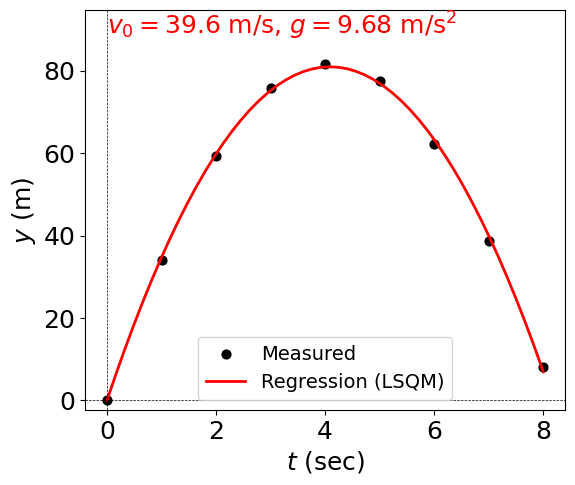

In [8]:
############################################
plt.rcParams['font.size'] = 18
#
fig = plt.figure( figsize=(6,5) )
fig.subplots_adjust( left=0.15, right=0.95, top=0.95,  bottom=0.15 )
#
########
ax1 = fig.add_subplot(1,1,1)
#
ax1.scatter( data_t, data_y, label='Measured', color='black', s=40 )
#
ax1.plot( data_t_reg, data_y_reg, label='Regression (LSQM)', color='red', linestyle='solid',  linewidth=2 )
#
y_bot, y_top = ax1.set_ylim()
y_center = (y_top + y_bot) / 2.0
y_diff   = (y_top - y_bot) / 2.0
#
y_top = y_center + 1.2 * y_diff
y_bot = 0.0 - 0.05 * y_diff
#
ax1.set_ylim( y_bot, y_top )
#
########
omega_str = r'$v_{0}=$%.1f m/s, $g=$%.2f m/s$^{2}$' % (omega_hat[0], omega_hat[1])
ax1.text( 0.0, y_top, omega_str, horizontalalignment='left', verticalalignment='top', color='red'  )
########
# 座標軸
ax1.axhline( y=0.0, color='black', linestyle='dashed', linewidth=0.5 )
ax1.axvline( x=0.0, color='black', linestyle='dashed', linewidth=0.5 )
#
ax1.set_xlabel( r'$t$ (sec)' )
ax1.set_ylabel( r'$y$ (m)' )
#
##############################
ax1.legend( fontsize=14 )
#
plt.show()
#
##############################
fig.savefig( FilePath + FileBaseName + '.pdf' )